In [1]:
import pandas as pd

In [2]:
seed=1234

In [3]:
#Abro el archivo con la informacion
#Abro el archivo con la informacion

#Normalizada
#data = pd.read_csv('attritionDataWithDummyVarsAndNorm.csv')

#Sin normalizar
data = pd.read_csv('attritionDataWithDummyVars.csv')


#Ensamble
#data = pd.read_csv('ensamble.csv')

### Data split

In [4]:
y=data['Dummy_Attrition_Yes']
x=data.drop(['Dummy_Attrition_Yes'], axis=1)

In [5]:
x.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,Dummy_JobRole_Research Director,Dummy_JobRole_Research Scientist,Dummy_JobRole_Sales Executive,Dummy_JobRole_Sales Representative,Dummy_MaritalStatus_Divorced,Dummy_MaritalStatus_Married,Dummy_MaritalStatus_Single,Dummy_Over18_Y,Dummy_OverTime_No,Dummy_OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=seed )

In [7]:
pd.DataFrame(y_train).Dummy_Attrition_Yes.value_counts()

0    863
1    166
Name: Dummy_Attrition_Yes, dtype: int64

In [8]:
pd.DataFrame(y_test).Dummy_Attrition_Yes.value_counts()

0    370
1     71
Name: Dummy_Attrition_Yes, dtype: int64

### Oversampling with SMOTE

In [9]:
#%pip install imblearn
from imblearn.over_sampling import SMOTE

In [10]:
sm = SMOTE(random_state=seed,sampling_strategy=0.3)

In [11]:
sm_x,sm_y=sm.fit_resample(x_train, y_train)

In [12]:
columns=x_train.columns

In [13]:
sm_x_df = pd.DataFrame(data=sm_x,columns=columns )
sm_y_df= pd.DataFrame(data=sm_y,columns=['Dummy_Attrition_Yes'])

In [14]:
# we can Check the numbers of our data
print("\033[1m Length of oversampled data is:",len(sm_x_df))
print("\033[1m Number of default in oversampled data is:",len(sm_y_df[sm_y_df['Dummy_Attrition_Yes']==1]))
print("\033[1m Number of no-default in oversampled data is:",len(sm_y_df[sm_y_df['Dummy_Attrition_Yes']==0]))
print("\033[1m Proportion of default data in oversampled data is:",len(sm_y_df[sm_y_df['Dummy_Attrition_Yes']==1])/len(sm_x_df))
print("\033[1m Proportion of no-default data in oversampled data is:",len(sm_y_df[sm_y_df['Dummy_Attrition_Yes']==0])/len(sm_x_df))

 Length of oversampled data is: 1121
 Number of default in oversampled data is: 258
 Number of no-default in oversampled data is: 863
 Proportion of default data in oversampled data is: 0.23015165031222123
 Proportion of no-default data in oversampled data is: 0.7698483496877788


In [15]:
pd.DataFrame(sm_y_df).Dummy_Attrition_Yes.value_counts()

0    863
1    258
Name: Dummy_Attrition_Yes, dtype: int64

In [16]:
#Comment this 2 lines if you dont want oversampling
#x_train=sm_x_df
#y_train=sm_y_df

### Oversampling with ADASYN

In [17]:
from imblearn.over_sampling import ADASYN

In [18]:
adasyn = ADASYN(sampling_strategy='auto', n_neighbors=5, random_state=seed)

#sampling_percentage = 0.3
#adasyn = ADASYN(sampling_strategy=sampling_percentage, n_neighbors=5, random_state=seed)

In [19]:
x_resampled, y_resampled = adasyn.fit_resample(x_train, y_train)

In [20]:
pd.DataFrame(y_resampled).Dummy_Attrition_Yes.value_counts()

0    863
1    854
Name: Dummy_Attrition_Yes, dtype: int64

In [21]:
#Comment this 2 lines if you dont want oversampling
x_train=x_resampled
y_train=y_resampled

### Simple tree

In [22]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=seed)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=1234)

In [23]:
from sklearn.metrics import accuracy_score

y_aux = model.predict(x_train)
accuracy_score(y_train, y_aux) #evaluo cuan bien predice el training set para ver comparar con el test y ver si overfitea o underfitea

1.0

In [24]:
y_pred = model.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8707482993197279

In [26]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
print(confusionMatrix)

### MATRIX IS INVERTED
## TN | FP
## FN | TP

[[364   6]
 [ 51  20]]


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#precision is the ratio tp / (tp + fp) % of real positive over all the positives given by the algorithm
#recall is the ratio tp / (tp + fn) positive predictions over total positive
#Accuracy tp+tn/(tp+tn+fp+fn)
#Specificity= tn/tn+fp negative predictions over total positive

tn=confusionMatrix[0,0]
fp=confusionMatrix[0,1]
fn=confusionMatrix[1,0]
tp=confusionMatrix[1,1]

# Second line on output is the good one


              precision    recall  f1-score   support

           0       0.88      0.98      0.93       370
           1       0.77      0.28      0.41        71

    accuracy                           0.87       441
   macro avg       0.82      0.63      0.67       441
weighted avg       0.86      0.87      0.84       441



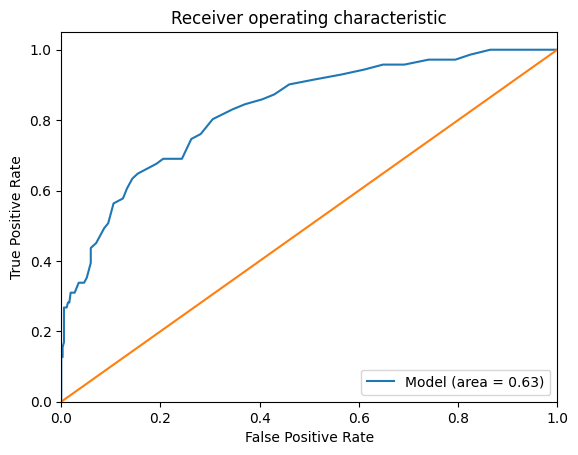

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 


model_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Model (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.savefig('DT_ROC')
plt.show()

<AxesSubplot: >

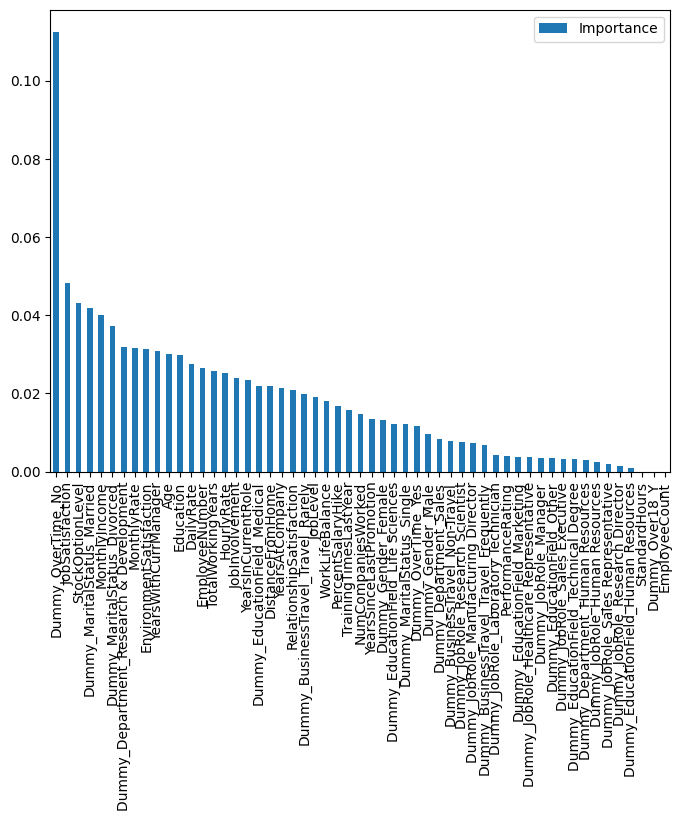

In [29]:
import matplotlib.pyplot as plt

feat_importances = pd.DataFrame(model.feature_importances_, index=x_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

## Optimizacion Bayesiana

In [30]:
#%pip uninstall scikit-learn
#%pip install scikit-learn
#%pip show scikit-learn
import warnings
warnings.filterwarnings('ignore')

In [31]:
from bayes_opt import BayesianOptimization

In [32]:
#Defines the function to maximize adding a cross validation feature to prevent overfitting 

from sklearn.model_selection import cross_val_score

def boParams(max_depth, max_features,min_samples_leaf,min_samples_split,n_estimators):
    
    params = {
        'max_depth': int(max_depth),
        'max_features': int(max_features),
        'min_samples_leaf': int(min_samples_leaf),
        'min_samples_split': int(min_samples_split),
        'n_estimators': int(n_estimators)
        
        
        
    }
    
    result = cross_val_score(RandomForestClassifier(random_state=seed, **params),
                             x_train, y_train,cv=3,scoring="f1_weighted").mean()
    
    #cv_result = xgb.cv(params, train_dmatrix, nfold=5)
    return result.mean()


#cross_val_score
#
#‘accuracy’
#‘roc_auc’
#"f1_weighted"
# f1
#https://scikit-learn.org/stable/modules/model_evaluation.html


In [33]:
# Sets the limits for the iteration of the different parameters

bo = BayesianOptimization(boParams, {'max_depth': (3, 15),
                                             'max_features': (2, 100),
                                             'min_samples_leaf':(3,100),
                                             'min_samples_split': (4, 100),
                                             'n_estimators':(10,200)
                                             },random_state=seed)

In [34]:
results = bo.maximize(n_iter=100, init_points=16)

|   iter    |  target   | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.8041    | 5.298     | 62.97     | 45.46     | 79.39     | 158.2     |
| 2         | 0.8037    | 6.271     | 29.09     | 80.78     | 95.98     | 176.4     |
| 3         | 0.7933    | 7.294     | 51.1      | 69.3      | 72.42     | 80.35     |
| 4         | 0.8088    | 9.734     | 51.3      | 4.336     | 78.19     | 177.7     |
| 5         | 0.8339    | 7.379     | 62.31     | 10.31     | 39.41     | 187.3     |
| 6         | 0.7961    | 10.82     | 40.93     | 79.51     | 34.42     | 117.9     |
| 7         | 0.7955    | 13.43     | 44.74     | 80.81     | 17.8      | 143.8     |
| 8         | 0.7997    | 11.45     | 23.44     | 92.71     | 46.45     | 182.8     |
| 9         | 0.8207    | 3.718     | 20.06     | 7.593     | 68.79     | 123.0     |
| 10        | 0.8595    | 9.4       | 6.246     | 57.4

| 58        | 0.9023    | 15.0      | 2.0       | 3.0       | 9.042     | 82.42     |
| 59        | 0.9129    | 15.0      | 2.0       | 3.0       | 9.511     | 200.0     |
| 60        | 0.8456    | 15.0      | 2.0       | 100.0     | 4.0       | 117.6     |
| 61        | 0.8906    | 15.0      | 20.09     | 3.0       | 4.0       | 123.3     |
| 62        | 0.8799    | 15.0      | 2.0       | 3.0       | 100.0     | 157.5     |
| 63        | 0.9118    | 15.0      | 2.0       | 3.0       | 11.8      | 192.5     |
| 64        | 0.8704    | 15.0      | 2.0       | 34.14     | 100.0     | 171.9     |
| 65        | 0.8454    | 15.0      | 2.0       | 100.0     | 65.9      | 112.1     |
| 66        | 0.8983    | 15.0      | 12.9      | 3.0       | 10.97     | 200.0     |
| 67        | 0.908     | 15.0      | 2.0       | 3.0       | 12.67     | 200.0     |
| 68        | 0.7101    | 15.0      | 100.0     | 100.0     | 100.0     | 10.0      |
| 69        | 0.8523    | 15.0      | 38.33     | 3.0 

| 116       | 0.7752    | 3.0       | 100.0     | 100.0     | 100.0     | 100.0     |


In [35]:
#Prints optimal parameters
params = bo.max['params']
print(params)

{'max_depth': 15.0, 'max_features': 2.0, 'min_samples_leaf': 3.0, 'min_samples_split': 9.51135781411828, 'n_estimators': 200.0}


In [36]:
#Cast the parameters to the correct format
params['max_depth']= int(params['max_depth'])
params['max_features']= int(params['max_features'])
params['min_samples_leaf']= int(params['min_samples_leaf'])
params['min_samples_split']= int(params['min_samples_split'])
params['n_estimators']= int(params['n_estimators'])


In [37]:
#I use the traning data to train the model and get the performance indicator. The idea is to compare with the testing
#indicators to make sure there is no overfitting 

modelTraining = RandomForestClassifier(**params,random_state=seed)
modelTraining.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, max_features=2, min_samples_leaf=3,
                       min_samples_split=9, n_estimators=200,
                       random_state=1234)

In [38]:
 predictionTraining = modelTraining.predict(x_train)

In [39]:
#Prints the report for training data
print(classification_report(y_train,predictionTraining))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       863
           1       1.00      0.95      0.97       854

    accuracy                           0.97      1717
   macro avg       0.98      0.97      0.97      1717
weighted avg       0.97      0.97      0.97      1717



In [40]:
#Now the model is trained with training and testing data but using testing data to evaluate
modelTest = RandomForestClassifier(**params,random_state=seed)
modelTest.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, max_features=2, min_samples_leaf=3,
                       min_samples_split=9, n_estimators=200,
                       random_state=1234)

In [41]:
#Predicts using testing data
predictionTest = modelTest.predict(x_test)

In [42]:
#Shows the different performance indicators for the test data
print(classification_report(y_test,predictionTest))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       370
           1       0.68      0.35      0.46        71

    accuracy                           0.87       441
   macro avg       0.78      0.66      0.69       441
weighted avg       0.85      0.87      0.85       441



In [43]:
#Prints the confusion matrix
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, predictionTest)
print(confusionMatrix)

### MATRIX IS INVERTED
## TN | FP
## FN | TP

[[358  12]
 [ 46  25]]


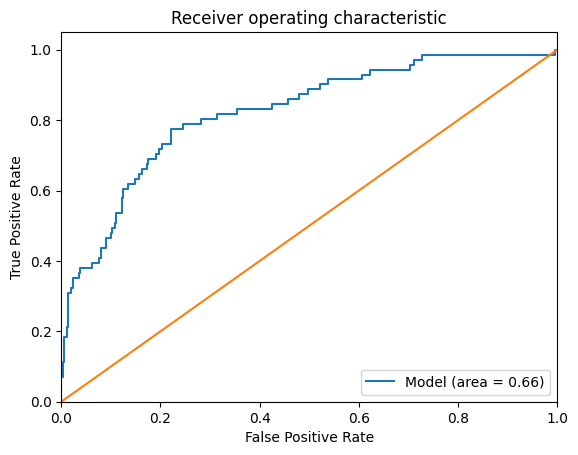

In [44]:
#Printes the area under the roc curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 


model_roc_auc = roc_auc_score(y_test, modelTest.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, modelTest.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Model (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.savefig('DT_ROC')
plt.show()

<AxesSubplot: >

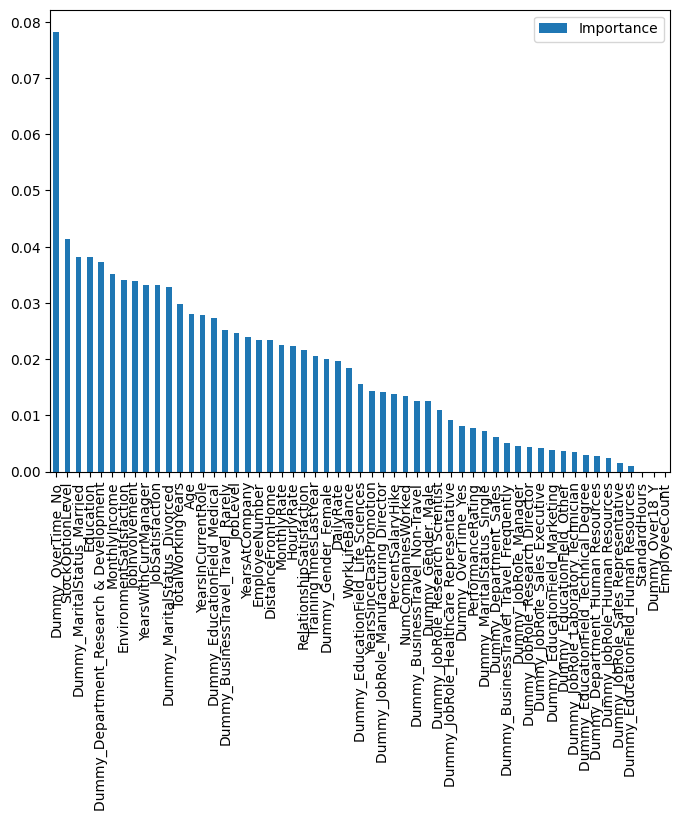

In [45]:
#Prints the feature importance
import matplotlib.pyplot as plt

feat_importances = pd.DataFrame(modelTest.feature_importances_, index=x_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

## Semillerio

In [46]:
def is_prime(num):
    if num <= 1:
        return False
    for i in range(2, int(num**0.5) + 1):
        if num % i == 0:
            return False
    return True

def generate_primes(n):
    primes = []
    num = 2 + seed
    while len(primes) < n:
        if is_prime(num):
            primes.append(num)
        num += 1
    return primes

In [47]:
n=30

In [48]:
import numpy as np
prime_list = generate_primes(n)
yPredSem=np.zeros_like(y_test)

In [49]:
for prime in prime_list:
    modelSem = RandomForestClassifier(**params,random_state=prime)
    modelSem.fit(x_train,y_train)
    pred = modelSem.predict(x_test)
    yPredSem=yPredSem+pred
    

In [50]:


yPredSem=np.round(yPredSem / n).astype(int)


In [51]:
#Shows the different performance indicators for the test data
print(classification_report(y_test,yPredSem))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       370
           1       0.70      0.32      0.44        71

    accuracy                           0.87       441
   macro avg       0.79      0.65      0.68       441
weighted avg       0.85      0.87      0.85       441



In [52]:
#Prints the confusion matrix
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, yPredSem)
print(confusionMatrix)

### MATRIX IS INVERTED
## TN | FP
## FN | TP

[[360  10]
 [ 48  23]]


In [53]:
model_roc_auc = roc_auc_score(y_test,yPredSem)
model_roc_auc

0.648458317472402

In [54]:
aux=x_test
aux['predict']=yPredSem
aux[['EmployeeNumber','predict']]

,EmployeeNumber,predict
298,407,0
625,864,0
1349,1893,1
1361,1918,0
343,463,0
...,...,...
1395,1967,0
305,419,0
1256,1760,0
553,763,0


### Export results to CSV

In [55]:
aux.to_csv('AttrttionResultsRF', index=False) 